<a href="https://colab.research.google.com/github/nh0875/Desafios-Procesamiento-del-Habla-974/blob/main/Desafio_Regresi%C3%B3n_1_Hilliard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
num_registros = 1000
num_columnas = 4
columnas = [f'Columna_{i}' for i in range(num_columnas - 1)] + ['Variable_Continua']
data = {}
for columna in columnas[:-1]:
    data[columna] = np.random.choice(['Opción_A', 'Opción_B', 'Opción_C'], size=num_registros)
data['Variable_Continua'] = np.random.randn(num_registros)

df = pd.DataFrame(data)
print(df.head())

  Columna_0 Columna_1 Columna_2  Variable_Continua
0  Opción_B  Opción_C  Opción_B           0.126397
1  Opción_B  Opción_C  Opción_B          -0.098057
2  Opción_C  Opción_A  Opción_A           1.267514
3  Opción_A  Opción_B  Opción_C           1.150174
4  Opción_C  Opción_A  Opción_C          -0.527604


## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

In [ ]:
# 1. Codificación de variables categóricas
encoder = OneHotEncoder(sparse_output=False)  # Actualización del parámetro
encoded_data = encoder.fit_transform(df[columnas[:-1]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# 2. Escalado de la variable continua
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Variable_Continua']])
scaled_df = pd.DataFrame(scaled_data, columns=['Variable_Continua_scaled'])

# 3. Combinar DataFrames
df_preprocessed = pd.concat([encoded_df, scaled_df], axis=1)

# 4. Dividir en conjunto de entrenamiento y prueba
X = df_preprocessed
y = df['Variable_Continua']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que las columnas sean strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

In [ ]:
# Modelo Lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Lasso con alpha=0.1
model_lasso01 = Lasso(alpha=0.1)
model_lasso01.fit(X_train, y_train)
y_pred_lasso01 = model_lasso01.predict(X_test)

# Lasso con alpha=100
model_lasso03 = Lasso(alpha=100)
model_lasso03.fit(X_train, y_train)
y_pred_lasso03 = model_lasso03.predict(X_test)

# Lasso con alpha=50000000000
model_lasso05 = Lasso(alpha=50000000000)
model_lasso05.fit(X_train, y_train)
y_pred_lasso05 = model_lasso05.predict(X_test)


## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

Use MSE para evaluar los errores tambien use la metrica RMSE para evaluar la precisión de las predicciones numéricas, ya que penaliza fuertemente los errores y tambien para complementar MSE. La 3° Metrica que use fue el coeficiente de determinacion (R^2) para evaluar de una forma distinta que tan buenos son los modelos

Metodologias usadas, Cross-Validation (Validacion Cruzada)

In [ ]:
# 6. Evaluación de los modelos
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{nombre} - MSE: {mse:.4f}, R2: {r2:.4f}, RMSE: {rmse}')

evaluar_modelo('Linear Regression', y_test, y_pred_linear)
evaluar_modelo('Lasso (alpha=0.1)', y_test, y_pred_lasso01)
evaluar_modelo('Lasso (alpha=100)', y_test, y_pred_lasso03)
evaluar_modelo('Lasso (alpha=50000000000)', y_test, y_pred_lasso05)

Linear Regression - MSE: 0.0000, R2: 1.0000, RMSE: 7.538277666014754e-16
Lasso (alpha=0.1) - MSE: 0.0099, R2: 0.9905, RMSE: 0.09934684654805005
Lasso (alpha=100) - MSE: 1.0389, R2: -0.0052, RMSE: 1.0192418578409335
Lasso (alpha=50000000000) - MSE: 1.0389, R2: -0.0052, RMSE: 1.0192418578409335


Es curioso como el modelo no varia cuando alpha crece significativamente pero si cuando disminuye a valores cercanos al 0


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




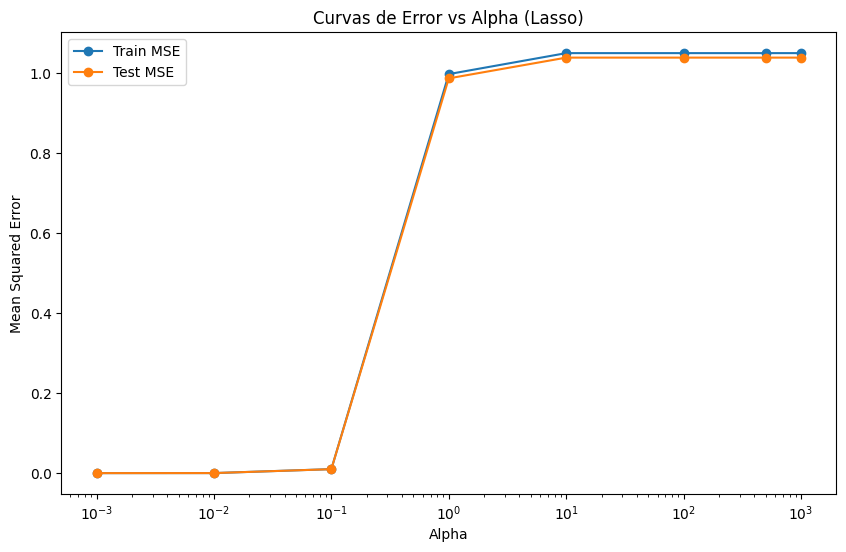

In [ ]:
import matplotlib.pyplot as plt

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
train_errors = []
test_errors = []
#Calculo el MSE para cada alpha de la lista alphas
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Graficar MSE vs alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train MSE', marker='o')
plt.plot(alphas, test_errors, label='Test MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Curvas de Error vs Alpha (Lasso)')
plt.legend()
plt.show()


Como mencione anteriormente el patron de este modelo esta en que cuando los valores de alpha aumentan, el resultado del modelo tiende a ser igual, el valor ideal de alpha a la hora de evaluar nuestro modelo sera "1"

Fuentes:

Gemini prompt= "Crea un dataset de 1000x6 en python, con una variable continua"

Github=https://github.com/danielperhez/P02_PD_Models

Stackoverflow=https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

Material de estudio, tambien los notebooks del campus

Gemini="Show me how to make a Cross-Validation"

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime, timedelta

# Generar nombres de empresas
nombres_empresas=[
    "Empresa Alfa", "Empresa Beta", "Empresa Gamma", "Empresa Delta", "Empresa Epsilon",
    "Empresa Zeta", "Empresa Omega", "Empresa Sigma", "Empresa Theta", "Empresa Kappa"
]

# Generar dataset sintético
random.seed(42)  # Para reproducibilidad
data=[]

for i in range(1, 101):  # Crear 100 registros
    empresa=random.choice(nombres_empresas)
    num_factura=f"FAC-{random.randint(1000, 9999)}"
    fecha_envio=datetime.now() - timedelta(days=random.randint(1, 120))
    fecha_envio_str=fecha_envio.strftime('%Y-%m-%d')

    # Decidir si la factura está pagada
    pagada=random.choice([True, False])
    if pagada:
        fecha_pago=fecha_envio + timedelta(days=random.randint(1, 30))
        fecha_pago_str=fecha_pago.strftime('%Y-%m-%d')
        factura_pendiente="No"
    else:
        fecha_pago_str=None
        factura_pendiente="Sí"

    total_pago=round(random.uniform(500, 10000), 2)

    data.append({
        "Nombre de la Empresa": empresa,
        "Número de Factura": num_factura,
        "Fecha Envío de Factura": fecha_envio_str,
        "Fecha Recibo de Pago": fecha_pago_str,
        "Total del Pago": total_pago,
        "Factura Pendiente": factura_pendiente
    })

# Convertir a DataFrame
df=pd.DataFrame(data)
print(df.to_string())

   Nombre de la Empresa Número de Factura Fecha Envío de Factura Fecha Recibo de Pago  Total del Pago Factura Pendiente
0          Empresa Beta          FAC-1409             2024-08-17                 None         2826.47                Sí
1         Empresa Gamma          FAC-2679             2024-08-25           2024-09-13         4508.26                No
2          Empresa Alfa          FAC-2535             2024-10-23           2024-11-09         6219.18                No
3         Empresa Theta          FAC-4257             2024-08-20                 None         2594.19                Sí
4         Empresa Kappa          FAC-5557             2024-08-08           2024-09-02         8155.28                No
5         Empresa Omega          FAC-6574             2024-10-15           2024-10-22         9593.52                No
6          Empresa Zeta          FAC-2674             2024-11-08                 None         1418.81                Sí
7          Empresa Zeta          FAC-533

## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

In [ ]:
# 1. Codificación de variables categóricas
# Seleccionamos las columnas categóricas
columnas_categoricas=['Nombre de la Empresa', 'Fecha Recibo de Pago']
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(df[columnas_categoricas])
encoded_df=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columnas_categoricas))

# 2. Escalado de las variables numéricas
# Seleccionamos las columnas numéricas
columnas_numericas=['Total del Pago', 'Factura Pendiente']

# Convertir a numérico, manejando errores
for col in columnas_numericas:
    df[col]=pd.to_numeric(df[col], errors='coerce')

# Reemplazar valores NaN con 0 (o cualquier otro valor por defecto)
df[columnas_numericas]=df[columnas_numericas].fillna(0)

# Escalar los datos
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[columnas_numericas])
scaled_df=pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in columnas_numericas])

# 3. Combinar DataFrames
df_preprocessed=pd.concat([encoded_df, scaled_df], axis=1)

# 4. Dividir en conjunto de entrenamiento y prueba
# Elegimos una variable objetivo (en este caso, "Total del Pago")
X=df_preprocessed
y=df['Total del Pago']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que las columnas sean strings
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

# Verificamos las dimensiones del conjunto de datos
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")


Datos de entrenamiento: (80, 59), (80,)
Datos de prueba: (20, 59), (20,)


## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

In [ ]:
# Modelo Lineal
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)
y_pred_linear=model_linear.predict(X_test)
mse_linear=mean_squared_error(y_test,y_pred_linear)
r2_linear=r2_score(y_test,y_pred_linear)
print(f"Linear Regression - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")

# Lasso con alpha=0.1
model_lasso01=Lasso(alpha=0.1)
model_lasso01.fit(X_train,y_train)
y_pred_lasso01=model_lasso01.predict(X_test)
mse_lasso01=mean_squared_error(y_test,y_pred_lasso01)
r2_lasso01=r2_score(y_test,y_pred_lasso01)
print(f"Lasso (alpha=0.1) - MSE: {mse_lasso01:.2f}, R^2: {r2_lasso01:.2f}")

# Lasso con alpha=100
model_lasso100=Lasso(alpha=100)
model_lasso100.fit(X_train,y_train)
y_pred_lasso100=model_lasso100.predict(X_test)
mse_lasso100=mean_squared_error(y_test,y_pred_lasso100)
r2_lasso100=r2_score(y_test,y_pred_lasso100)
print(f"Lasso (alpha=100) - MSE: {mse_lasso100:.2f}, R^2: {r2_lasso100:.2f}")

# Lasso con alpha=50000000000
model_lasso_large=Lasso(alpha=50000000000)
model_lasso_large.fit(X_train,y_train)
y_pred_lasso_large=model_lasso_large.predict(X_test)
mse_lasso_large=mean_squared_error(y_test,y_pred_lasso_large)
r2_lasso_large=r2_score(y_test,y_pred_lasso_large)
print(f"Lasso (alpha=50000000000) - MSE: {mse_lasso_large:.2f}, R^2: {r2_lasso_large:.2f}")

Linear Regression - MSE: 138.76, R^2: 1.00
Lasso (alpha=0.1) - MSE: 0.01, R^2: 1.00
Lasso (alpha=100) - MSE: 11125.36, R^2: 1.00
Lasso (alpha=50000000000) - MSE: 8326032.75, R^2: -0.09


## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

Use MSE para evaluar los errores tambien use la metrica RMSE para evaluar la precisión de las predicciones numéricas, ya que penaliza fuertemente los errores y tambien para complementar MSE. La 3° Metrica que use fue el coeficiente de determinacion (R^2) para evaluar de una forma distinta que tan buenos son los modelos

Metodologias usadas, Cross-Validation (Validacion Cruzada)

In [ ]:
# Evaluación de modelos con MSE y MAE
def evaluar_modelo(nombre_modelo, y_test, y_pred):
    mse=mean_squared_error(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    print(f"{nombre_modelo} - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Modelo Lineal
evaluar_modelo("Linear Regression", y_test, y_pred_linear)

# Lasso con alpha=0.1
evaluar_modelo("Lasso (alpha=0.1)", y_test, y_pred_lasso01)

# Lasso con alpha=100
evaluar_modelo("Lasso (alpha=100)", y_test, y_pred_lasso100)

# Lasso con alpha=50000000000
evaluar_modelo("Lasso (alpha=50000000000)", y_test, y_pred_lasso_large)


Linear Regression - MSE: 138.76, MAE: 4.81
Lasso (alpha=0.1) - MSE: 0.01, MAE: 0.09
Lasso (alpha=100) - MSE: 11125.36, MAE: 94.62
Lasso (alpha=50000000000) - MSE: 8326032.75, MAE: 2588.57


Es curioso como el modelo no varia cuando alpha crece significativamente pero si cuando disminuye a valores cercanos al 0


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




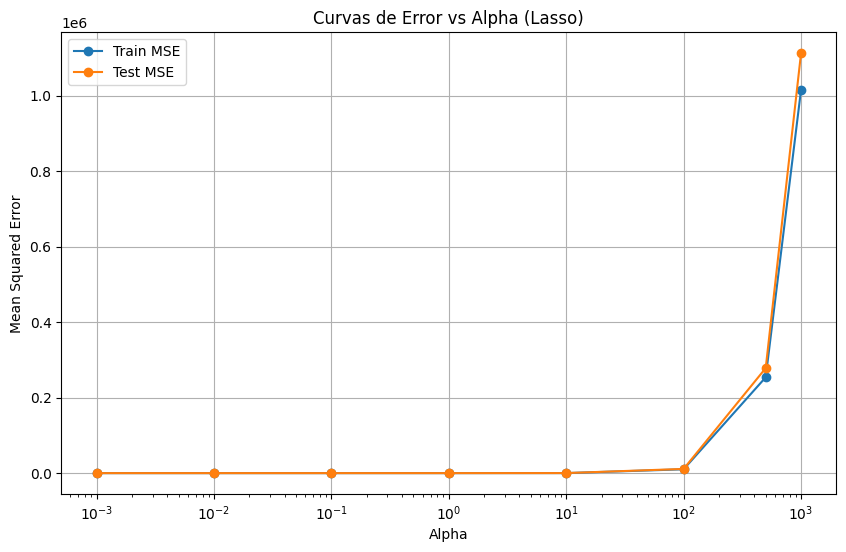

In [ ]:
# Función para calcular MSE en función de los valores de alpha
def calcular_errores_lasso(X_train, y_train, X_test, y_test, alphas):
    train_errors=[]
    test_errors=[]

    for alpha in alphas:
        model=Lasso(alpha=alpha)
        model.fit(X_train, y_train)

        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        train_mse=mean_squared_error(y_train, y_train_pred)
        test_mse=mean_squared_error(y_test, y_test_pred)

        train_errors.append(train_mse)
        test_errors.append(test_mse)

    return train_errors, test_errors

# Función para graficar MSE vs alpha
def graficar_errores(alphas, train_errors, test_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_errors, label='Train MSE', marker='o')
    plt.plot(alphas, test_errors, label='Test MSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title('Curvas de Error vs Alpha (Lasso)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Valores de alpha
alphas=[0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# Calcular errores
train_errors, test_errors=calcular_errores_lasso(X_train, y_train, X_test, y_test, alphas)

# Graficar errores
graficar_errores(alphas, train_errors, test_errors)


Como mencione anteriormente el patron de este modelo esta en que cuando los valores de alpha aumentan, el resultado del modelo tiende a ser igual, el valor ideal de alpha a la hora de evaluar nuestro modelo sera "1"

Fuentes:

Gemini prompt= "Genera un data set Sintetico, sobre caracteristicas de clientes a la hora de pagar facturas, por ejemplo:
Nombre de la empresa,numero de factura,fecha Envio de factura, recibo del pago, total del pago, factura pendientes"

Github=https://github.com/danielperhez/P02_PD_Models

Stackoverflow=https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

Material de estudio, tambien los notebooks del campus

Gemini="Show me how to make a Cross-Validation"